#Muhammad Rizki Mardanu Hilman

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import math
from folium.plugins import FastMarkerCluster
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_auc_score

In [ ]:
df = pd.read_csv('honda_sell_data.csv')
df.head()

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,Ridgeline RTL,New,"$46,370",4.8,9,Platinum White Pearl,Beige,All-wheel Drive,...,00830164,10,5.0,4.8,4.8,4.2,5.0,5.0,CA,Dealer
1,2023,Honda,CR-V Hybrid Sport,New,"$34,150",1.7,24,Platinum White Pearl,Black,FWD,...,6402953,–,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
2,2023,Honda,CR-V Hybrid Sport,New,"$34,245",4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,...,PH704805,1,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
3,2022,Honda,Pilot TrailSport,New,"$46,500",5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,...,5700429B,5,5.0,5.0,5.0,5.0,5.0,5.0,CA,Dealer
4,2023,Honda,CR-V Hybrid Sport Touring,New,"$40,395",4.4,12,Crystal Black Pearl,Black,All-wheel Drive,...,5705954,5,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer


In [ ]:
# pengelompokan kolom berdasarkan typedata (numerikal & kategorikal)
df.select_dtypes(exclude='object').columns
df.select_dtypes(include='object').columns
nums = df.select_dtypes(exclude='object').columns
cats = df.select_dtypes(include='object').columns

In [ ]:
cats

Index(['Make', 'Model', 'Condition', 'Price', 'Exterior_Color',
       'Interior_Color', 'Drivetrain', 'MPG', 'Fuel_Type', 'Transmission',
       'Engine', 'VIN', 'Stock_#', 'Mileage', 'State', 'Seller_Type'],
      dtype='object')

In [ ]:
nums

Index(['Year', 'Consumer_Rating', 'Consumer_Review_#', 'Comfort_Rating',
       'Interior_Design_Rating', 'Performance_Rating',
       'Value_For_Money_Rating', 'Exterior_Styling_Rating',
       'Reliability_Rating'],
      dtype='object')

In [ ]:
df['Condition'].unique()

array(['New', 'Used', 'Honda Certified'], dtype=object)

# Explore Data Analysis

## Descriptive Statistics

In [ ]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4999 non-null   int64  
 1   Make                     4999 non-null   object 
 2   Model                    4999 non-null   object 
 3   Condition                4999 non-null   object 
 4   Price                    4999 non-null   object 
 5   Consumer_Rating          4999 non-null   float64
 6   Consumer_Review_#        4999 non-null   int64  
 7   Exterior_Color           4988 non-null   object 
 8   Interior_Color           4988 non-null   object 
 9   Drivetrain               4988 non-null   object 
 10  MPG                      3514 non-null   object 
 11  Fuel_Type                4988 non-null   object 
 12  Transmission             4988 non-null   object 
 13  Engine                   4988 non-null   object 
 14  VIN                     

In [ ]:
# melihat statistik deskriptif pada data
df.describe()

,Year,Consumer_Rating,Consumer_Review_#,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating
count,4999.000000,4999.000000,4999.000000,4447.00000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000
mean,2020.507702,4.569654,1288.366673,4.81754,4.706814,4.663931,4.580976,4.731954,4.866269
std,3.711361,0.542453,1969.998095,0.25903,0.476941,0.351680,0.372107,0.313093,0.190886
min,1981.000000,1.200000,0.000000,3.80000,3.000000,3.600000,3.600000,3.900000,4.000000
25%,2019.000000,4.400000,126.000000,4.70000,4.700000,4.500000,4.200000,4.600000,4.800000
50%,2022.000000,4.700000,697.000000,4.90000,4.800000,4.800000,4.600000,4.800000,5.000000
75%,2023.000000,4.900000,1695.500000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2023.000000,5.000000,29258.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# melihat data duplikat
df.duplicated().sum()

0

In [ ]:
missing = []
unique = []
types = []
variables = []
count = []
duplicated =[]

for item in df.columns :
    variables.append(item)
    missing.append(df[item].isnull().sum())
    unique.append(df[item].nunique())
    types.append(df[item].dtypes)
    count.append(len(df[item]))
    duplicated.append(df[item].duplicated().sum())

output = pd.DataFrame({
    'variable': variables,
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing,
    'duplicated' : duplicated,
})
output.sort_values("missing",ascending=False).reset_index(drop=True)

,variable,dtype,count,unique,missing,duplicated
0,MPG,object,4999,125,1485,4873
1,Reliability_Rating,float64,4999,11,552,4987
2,Exterior_Styling_Rating,float64,4999,12,552,4986
3,Value_For_Money_Rating,float64,4999,14,552,4984
4,Performance_Rating,float64,4999,15,552,4983
5,Interior_Design_Rating,float64,4999,13,552,4985
6,Comfort_Rating,float64,4999,13,552,4985
7,Seller_Type,object,4999,2,73,4996
8,State,object,4999,53,73,4945
9,Engine,object,4999,75,11,4923


## Handling data type

In [ ]:
df['Price'] = df.Price.map(lambda x: x.replace('$','').replace(',','').replace('Not Priced','0')).astype(int)

#Dropping Columns

In [ ]:
df.drop(columns=['VIN', 'Stock_#', 'Mileage', 'Model', 'Exterior_Color', 'Interior_Color',
                'MPG', 'Transmission', 'Engine'], inplace=True)
df.shape

(4999, 16)

## Handling missing values

In [ ]:
# Fill the missing values with mean of the data
df.Reliability_Rating = df.Reliability_Rating.fillna(df[df.Reliability_Rating.isnull()==False]['Reliability_Rating'].mean())

df.Exterior_Styling_Rating = df.Exterior_Styling_Rating.fillna(df[df.Exterior_Styling_Rating.isnull()==False]['Exterior_Styling_Rating'].mean())

df.Value_For_Money_Rating = df.Value_For_Money_Rating.fillna(df[df.Value_For_Money_Rating.isnull()==False]['Value_For_Money_Rating'].mean())

df.Performance_Rating = df.Performance_Rating.fillna(df[df.Performance_Rating.isnull()==False]['Performance_Rating'].mean())

df.Interior_Design_Rating = df.Interior_Design_Rating.fillna(df[df.Interior_Design_Rating.isnull()==False]['Interior_Design_Rating'].mean())

df.Comfort_Rating = df.Comfort_Rating.fillna(df[df.Comfort_Rating.isnull()==False]['Comfort_Rating'].mean())

df['Fuel_Type'].fillna('Other', inplace=True)

#df.Fuel_Type = df.Fuel_Type.fillna(df[df.Fuel_Type.isnull()==False]['Fuel_Type'].mode()[0])

# for Seller_Type Fill it with "Dealer"
df.Seller_Type = df.Seller_Type.fillna("Dealer")

# for state Fill it with the most data presented which is 'CA'
df.State = df.State.fillna(df.State.value_counts().index[0])

# for drivetrain Fill it with the most data presented which is 'Front-wheel Drive'
df.Drivetrain = df.Drivetrain.fillna(df.Drivetrain.value_counts().index[0])



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4999 non-null   int64  
 1   Make                     4999 non-null   object 
 2   Condition                4999 non-null   object 
 3   Price                    4999 non-null   int64  
 4   Consumer_Rating          4999 non-null   float64
 5   Consumer_Review_#        4999 non-null   int64  
 6   Drivetrain               4999 non-null   object 
 7   Fuel_Type                4999 non-null   object 
 8   Comfort_Rating           4999 non-null   float64
 9   Interior_Design_Rating   4999 non-null   float64
 10  Performance_Rating       4999 non-null   float64
 11  Value_For_Money_Rating   4999 non-null   float64
 12  Exterior_Styling_Rating  4999 non-null   float64
 13  Reliability_Rating       4999 non-null   float64
 14  State                   

# EDA-Exploratory Data Analysis

## Looking at the average prices in some other countries

In [ ]:
df['State'].unique()

array(['CA', 'NV', 'AZ', 'UT', 'CO', 'WA', 'NE', 'OK', 'TX', 'KS', 'MO',
       'IA', 'MN', 'LA', 'WI', 'IL', 'KY', 'MI', 'IN', 'GA', 'OH', 'TN',
       'NC', 'VA', 'FL', 'MD', 'DE', 'PA', 'NJ', 'CT', 'MA', 'AR', 'WV',
       'NY', 'NH', 'NM', 'OR', 'VT', 'SC', 'ID', 'MT', 'SD', 'ND', 'AL',
       'AK', 'ME', 'HI', 'MS', 'RI', 'Route', 'WY', 'Glens', 'MO-22'],
      dtype=object)

In [ ]:
# create a dictionary with state abbreviations as keys and full state names as values
state_dict = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# use the dictionary to replace the state abbreviations with full state names
df['State'] = df['State'].replace(state_dict)
# print the updated DataFrame
df.head()

,Year,Make,Condition,Price,Consumer_Rating,Consumer_Review_#,Drivetrain,Fuel_Type,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,New,46370,4.8,9,All-wheel Drive,Gasoline,5.0,4.8,4.8,4.2,5.0,5.0,California,Dealer
1,2023,Honda,New,34150,1.7,24,FWD,Hybrid,5.0,3.0,4.0,4.0,5.0,5.0,California,Dealer
2,2023,Honda,New,34245,4.7,2869,Front-wheel Drive,Hybrid,5.0,3.0,4.0,4.0,5.0,5.0,California,Dealer
3,2022,Honda,New,46500,5.0,12,All-wheel Drive,Gasoline,5.0,5.0,5.0,5.0,5.0,5.0,California,Dealer
4,2023,Honda,New,40395,4.4,12,All-wheel Drive,Hybrid,5.0,3.0,4.0,4.0,5.0,5.0,California,Dealer


In [ ]:
df.to_csv('honda.csv', index=False)

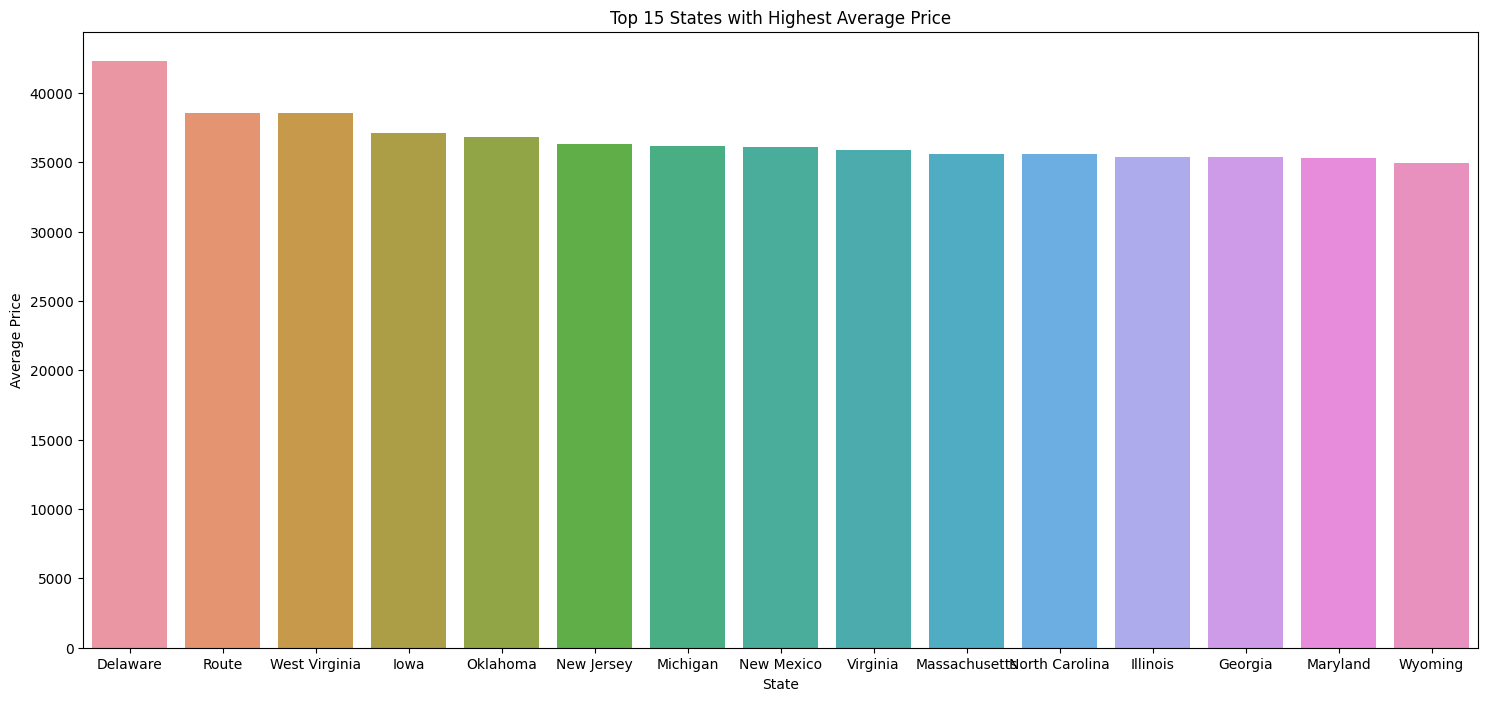

In [ ]:
# group data by state and compute mean price
state_price = df.groupby('State')['Price'].mean()

# sort by price in descending order and select top 15 states
top_states = state_price.sort_values(ascending=False).head(15)

# create bar plot
plt.figure(figsize=(18, 8))
sns.barplot(x=top_states.index, y=top_states.values)
plt.xlabel('State')
plt.ylabel('Average Price')
plt.title('Top 15 States with Highest Average Price')
plt.show()

## Examining the correlation between the 'Make,Condition,Drivetrain,Fuel_Type,Seller_Type features and price.

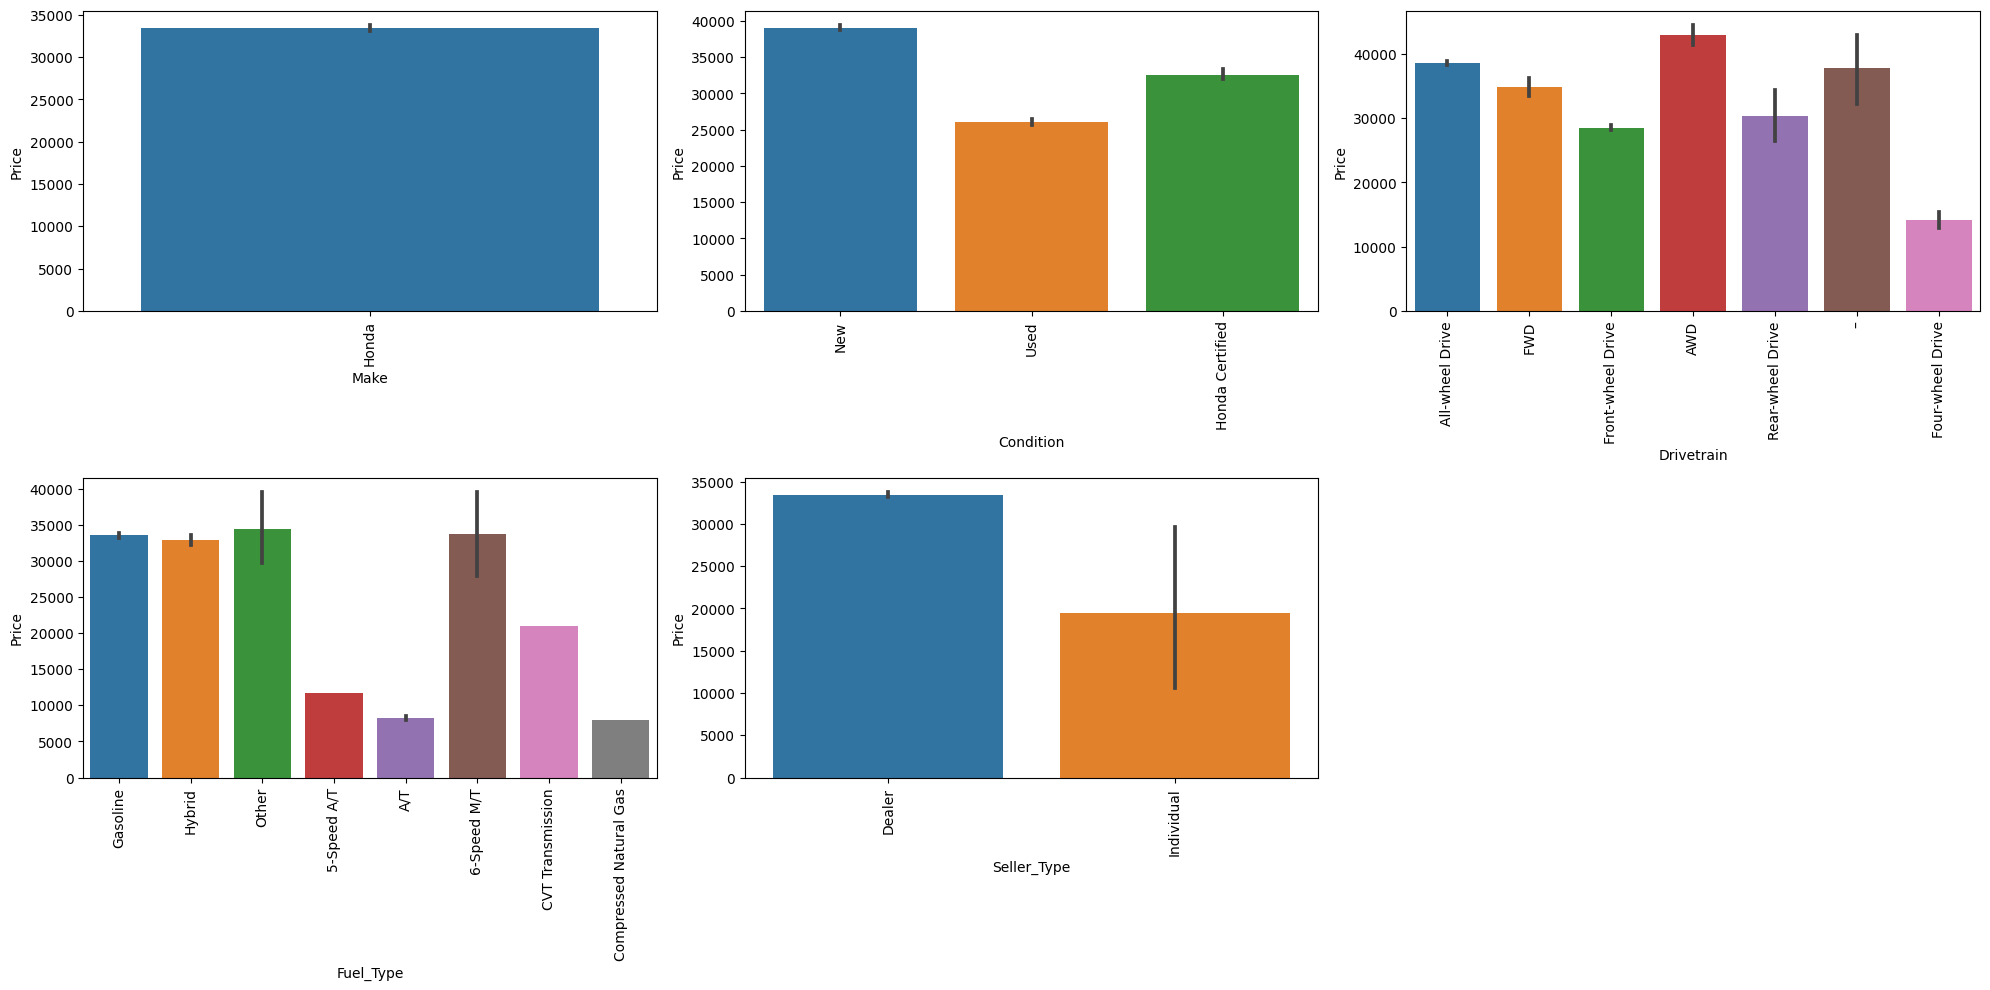

In [ ]:
# list of categorical variables to plot
cat_vars = ['Make', 'Condition', 'Drivetrain', 'Fuel_Type', 'Seller_Type']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.ravel()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# remove the sixth subplot
fig.delaxes(axs[5])

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()


<ipython-input-20-6c616ec3c4d6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  condition_car = df.groupby(['Condition','Year']).mean().reset_index()


[Text(0.5, 1.0, 'Average price depends on the condition')]

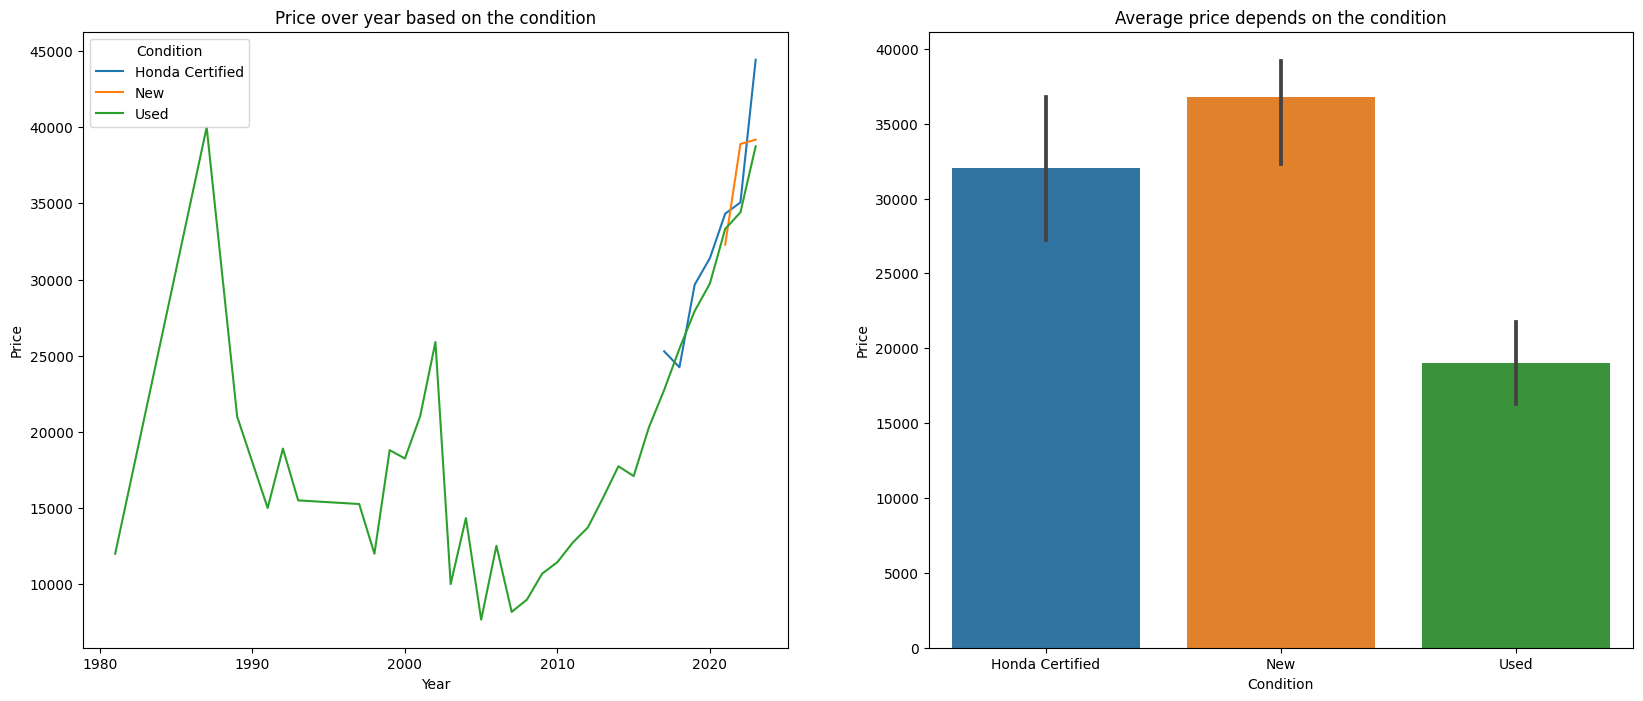

In [ ]:
condition_car = df.groupby(['Condition','Year']).mean().reset_index()

fig = plt.figure(figsize=(20,8))
ax1= fig.add_subplot(121)
sns.lineplot(condition_car,y='Price',x='Year',hue='Condition')
ax1.set(title="Price over year based on the condition")

ax2= fig.add_subplot(122)
sns.barplot(condition_car,y='Price',x='Condition')
ax2.set(title="Average price depends on the condition")

## Let's determine which type of fuel is most commonly used in a car.

In [ ]:
df['Fuel_Type'].value_counts()

Gasoline                  4393
Hybrid                     588
Other                       11
A/T                          2
6-Speed M/T                  2
5-Speed A/T                  1
CVT Transmission             1
Compressed Natural Gas       1
Name: Fuel_Type, dtype: int64

In [ ]:
df['Fuel_Type'].isna().sum()

0

[Text(0.5, 1.0, 'Most used fuel type of car')]

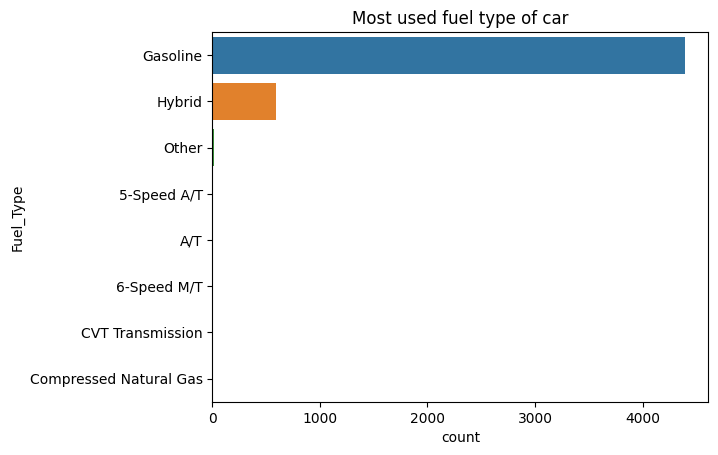

In [ ]:
fig = sns.countplot(df['Fuel_Type'],y=df['Fuel_Type'])
fig.set(title="Most used fuel type of car")

## The price range or the distribution of prices.

<Axes: xlabel='Price', ylabel='Count'>

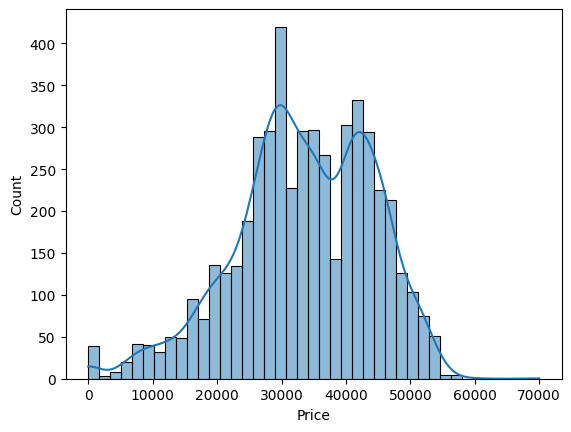

In [ ]:
# Lets create histogram
# count,bins_edge = np.histogram(df.Price)
sns.histplot(data=df, x="Price", kde=True)

## Examining the correlation between the column feature and the car prices.

In [ ]:
# using correlation statistical method to find the relation between the price and other features
df.corr()['Price'].sort_values(ascending=False)

<ipython-input-25-ba0f0ff6d6e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price'].sort_values(ascending=False)


Price                      1.000000
Year                       0.659218
Comfort_Rating             0.517805
Reliability_Rating         0.403277
Performance_Rating         0.147470
Interior_Design_Rating     0.116039
Exterior_Styling_Rating    0.098607
Consumer_Rating            0.074477
Consumer_Review_#          0.044798
Value_For_Money_Rating    -0.080177
Name: Price, dtype: float64

<ipython-input-26-7da4af059c19>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


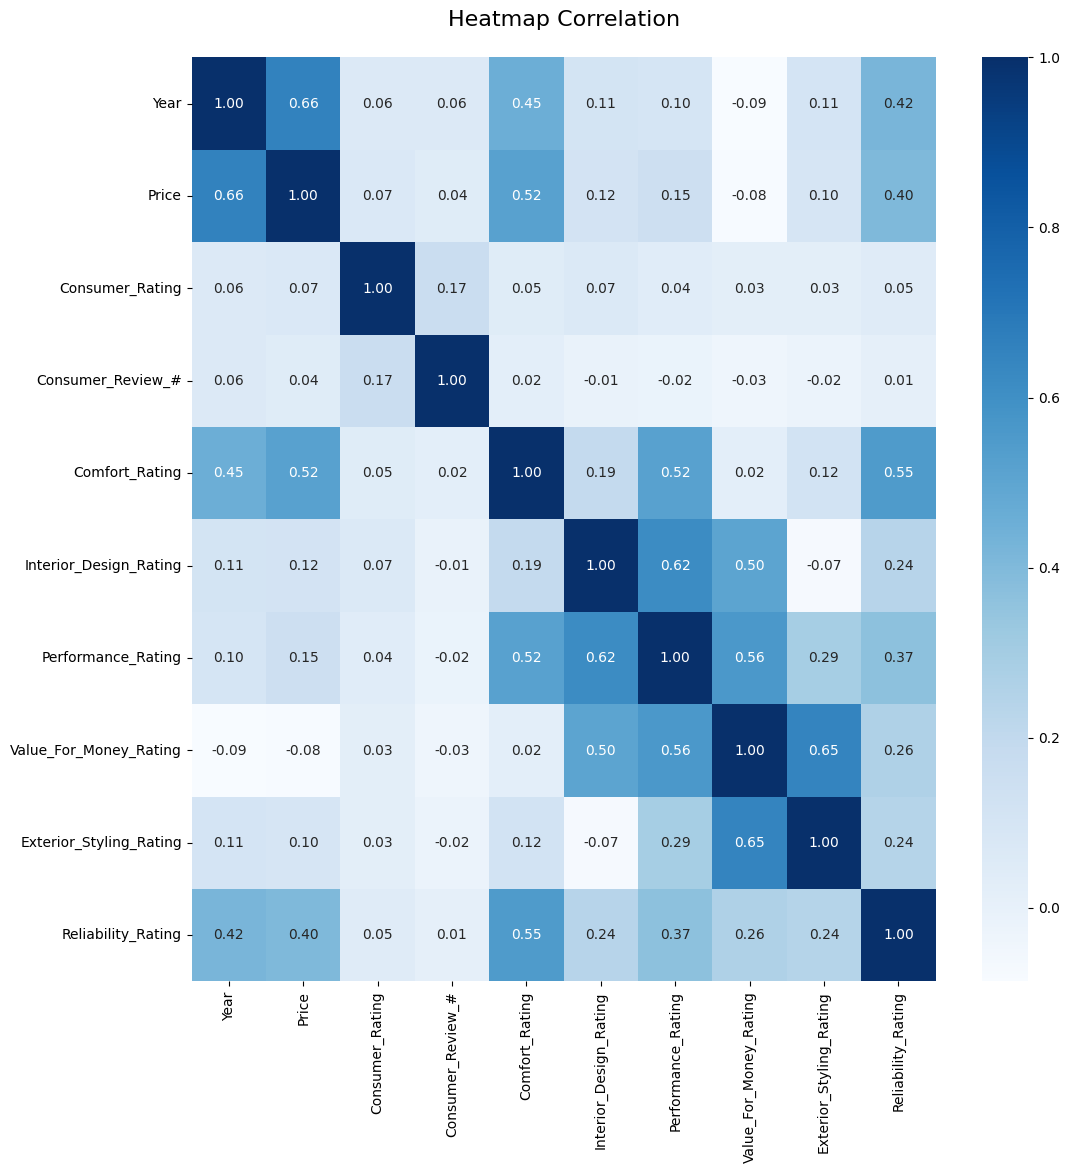

In [ ]:
# melihat korelasi antar kolom numerikal dengan heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Heatmap Correlation\n', fontsize=16)
plt.show()

## Examining the correlation between the rating column feature and the car prices.

Price                      1.000000
Comfort_Rating             0.517805
Reliability_Rating         0.403277
Performance_Rating         0.147470
Interior_Design_Rating     0.116039
Exterior_Styling_Rating    0.098607
Value_For_Money_Rating     0.080177
Consumer_Rating            0.074477
Name: Price, dtype: float64


<Axes: xlabel='Comfort_Rating', ylabel='Price'>

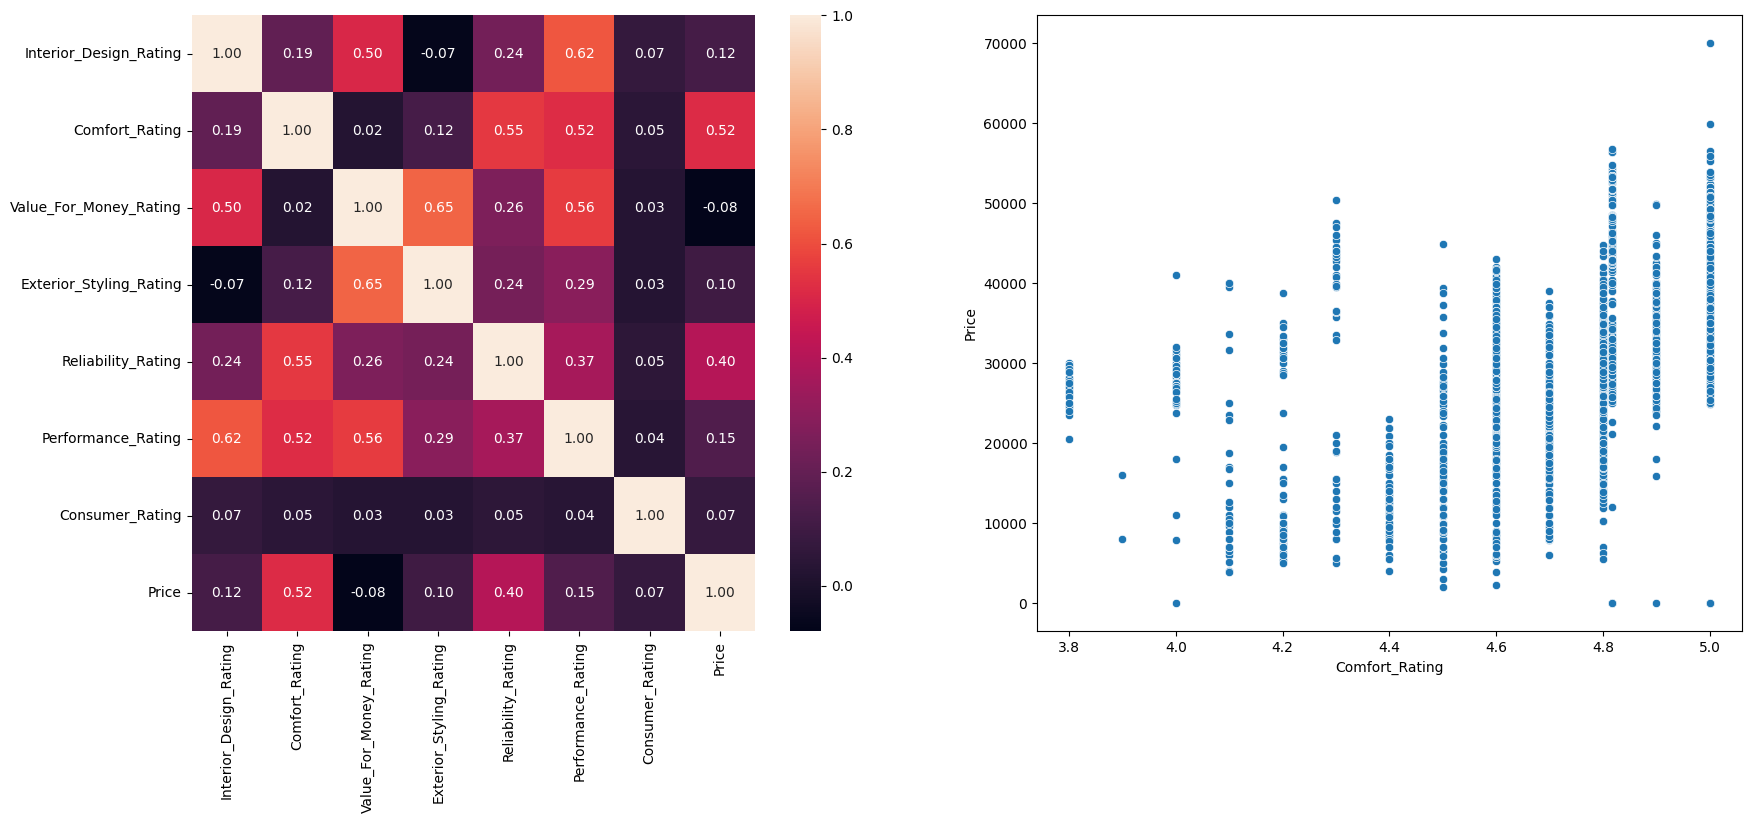

In [ ]:
# Let see the correlation each rating column for price of the car
col = """Interior_Design_Rating
Comfort_Rating
Value_For_Money_Rating
Exterior_Styling_Rating
Reliability_Rating
Performance_Rating
Consumer_Rating
Price"""
col = col.split('\n')
corr_rate = df[col].corr()
fig = plt.figure(figsize=(20,8))

price_corr = abs(corr_rate['Price'])

print(price_corr.sort_values(ascending=False))

ax1 = fig.add_subplot(121)
sns.heatmap(corr_rate,annot=True,fmt='.2f')

ax2 = fig.add_subplot(122)
sns.scatterplot(df,y='Price',x='Comfort_Rating')

## Checking Outliers

## To visualize using a box plot.

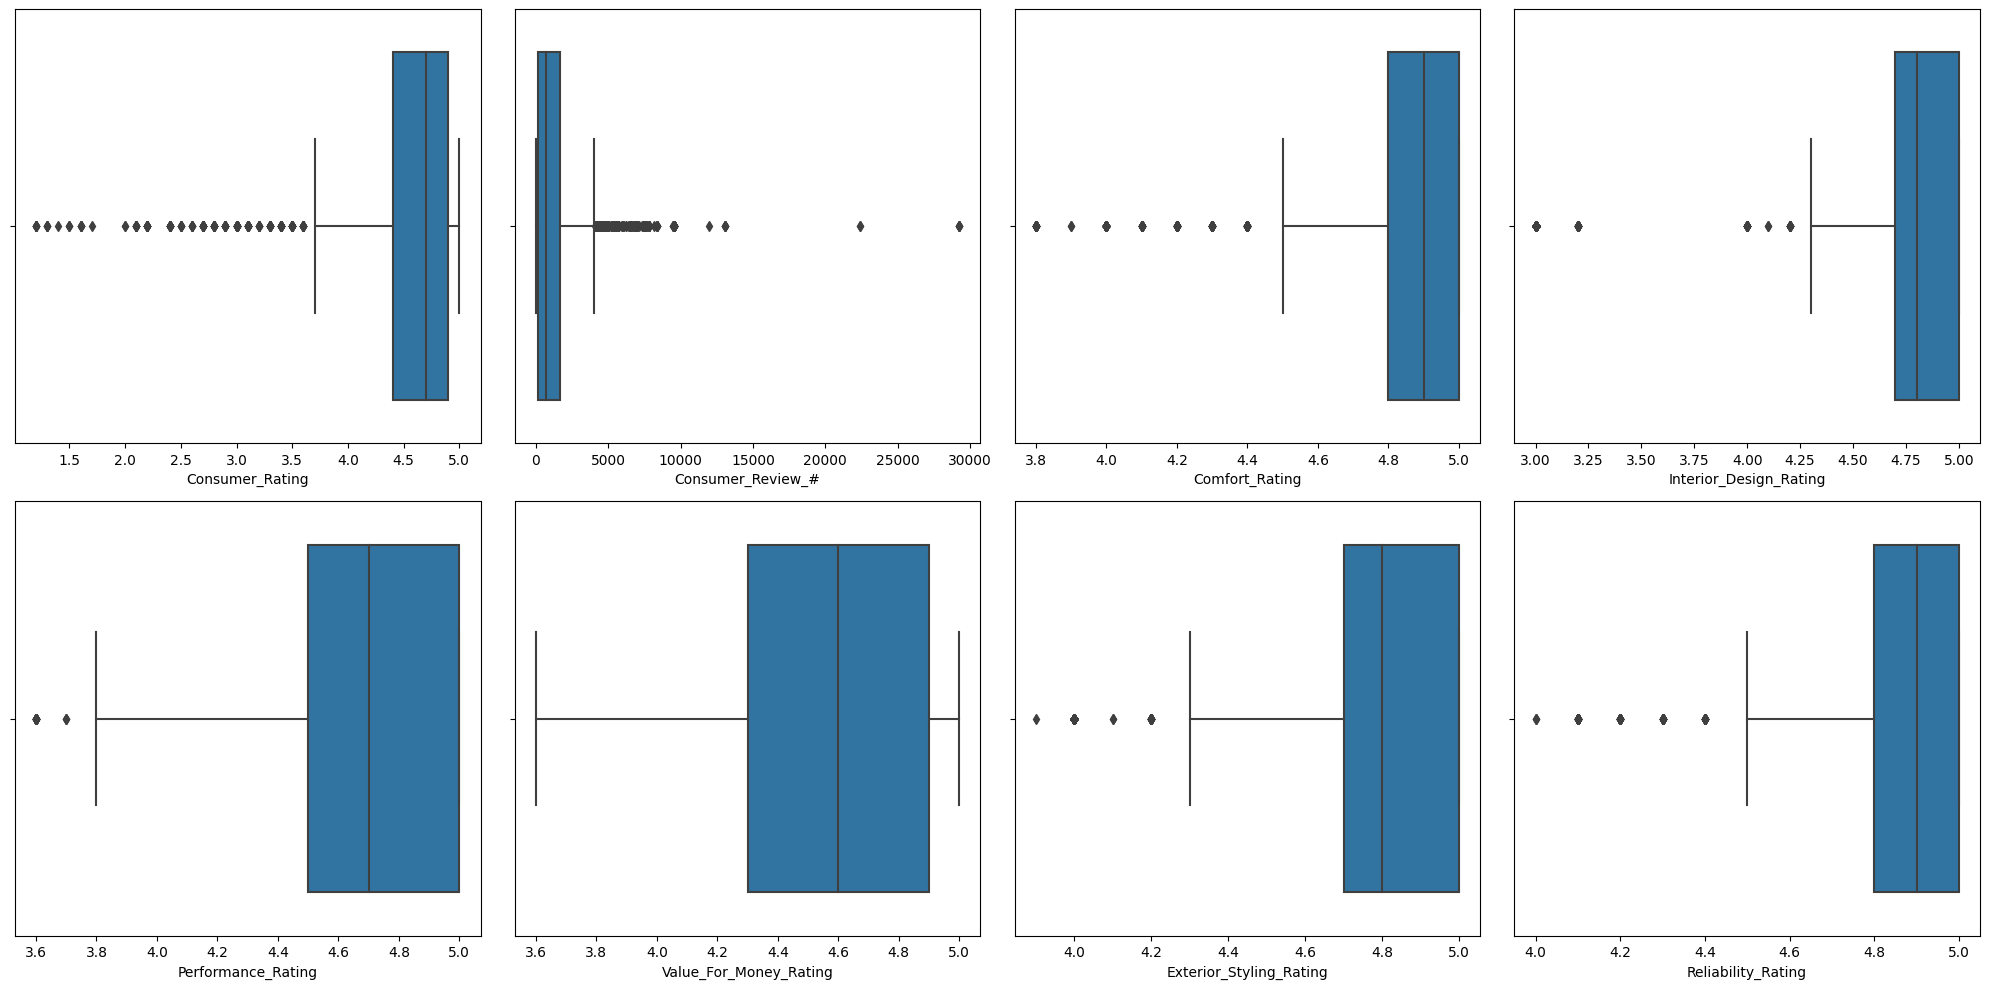

In [ ]:
num_vars = ['Consumer_Rating', 'Consumer_Review_#', 'Comfort_Rating', 'Interior_Design_Rating', 'Performance_Rating',
            'Value_For_Money_Rating', 'Exterior_Styling_Rating', 'Reliability_Rating']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

## To visualize using a Violin

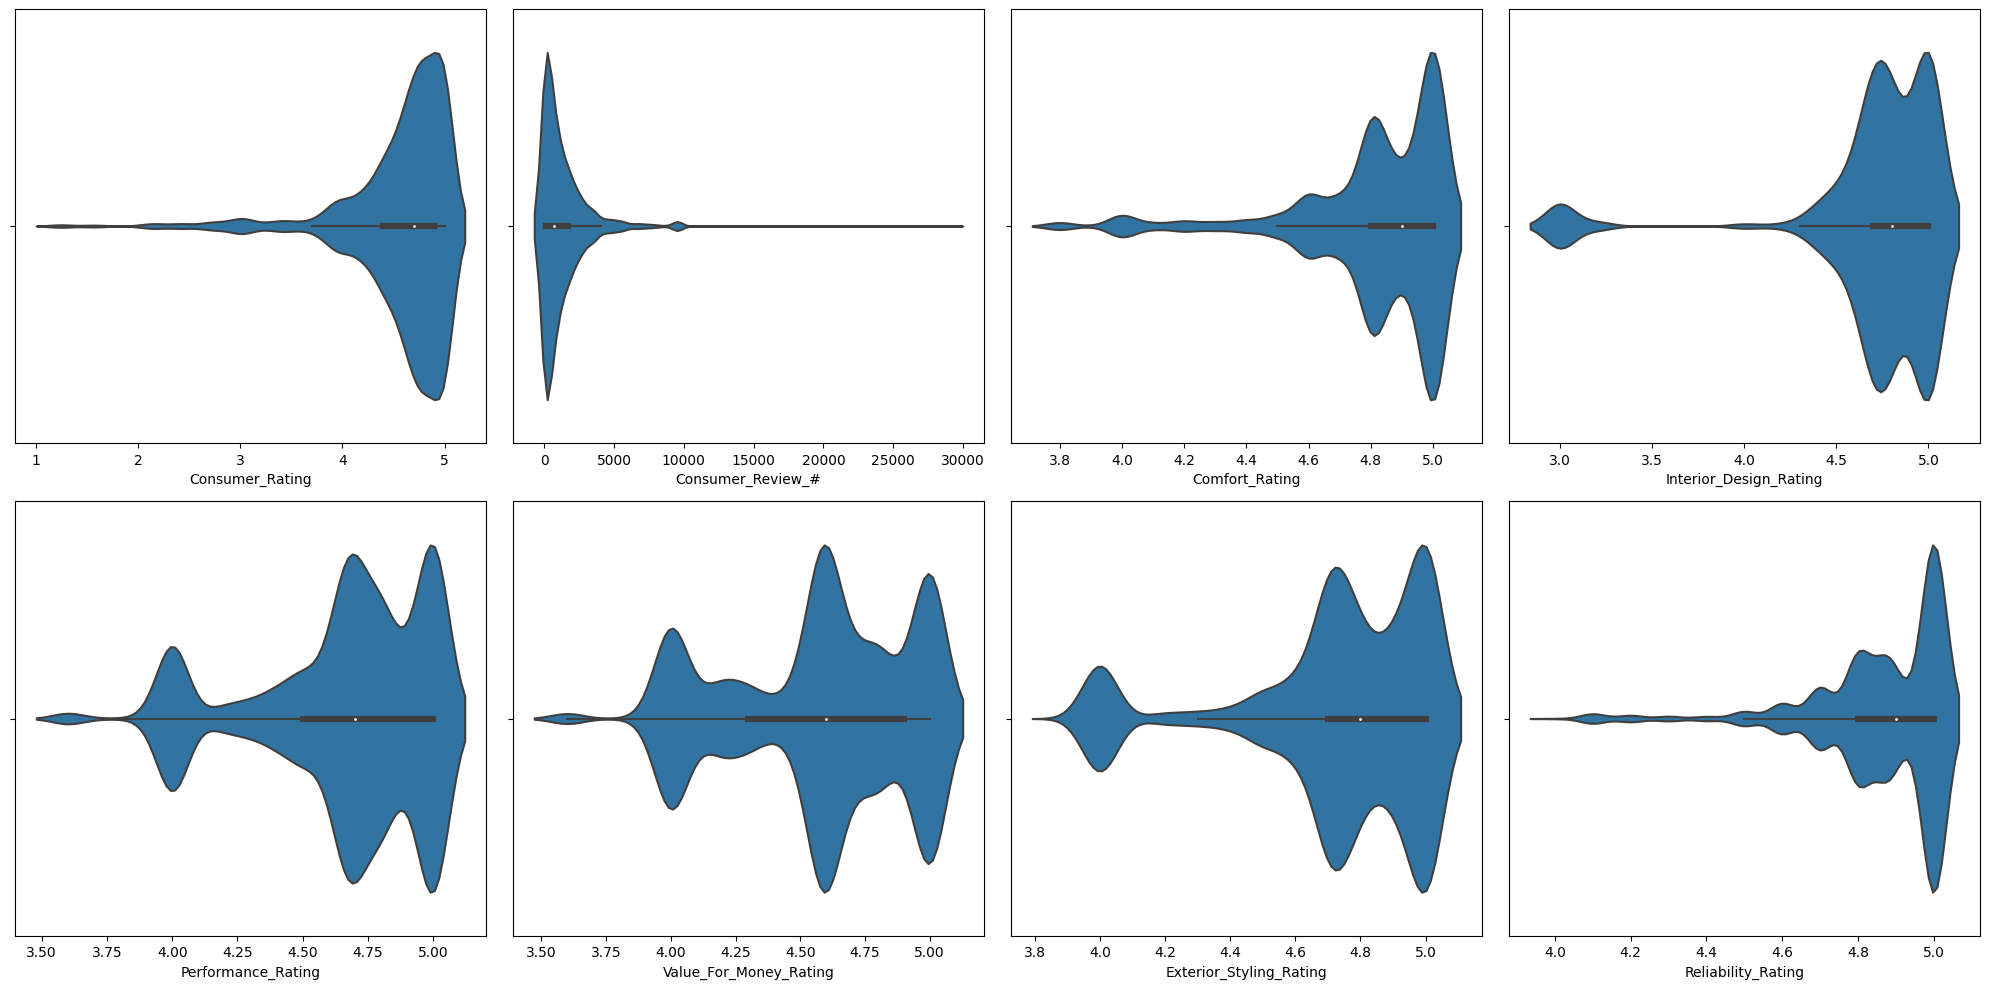

In [ ]:
num_vars = ['Consumer_Rating', 'Consumer_Review_#', 'Comfort_Rating', 'Interior_Design_Rating', 'Performance_Rating',
            'Value_For_Money_Rating', 'Exterior_Styling_Rating', 'Reliability_Rating']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

## To visualize using scatterplot

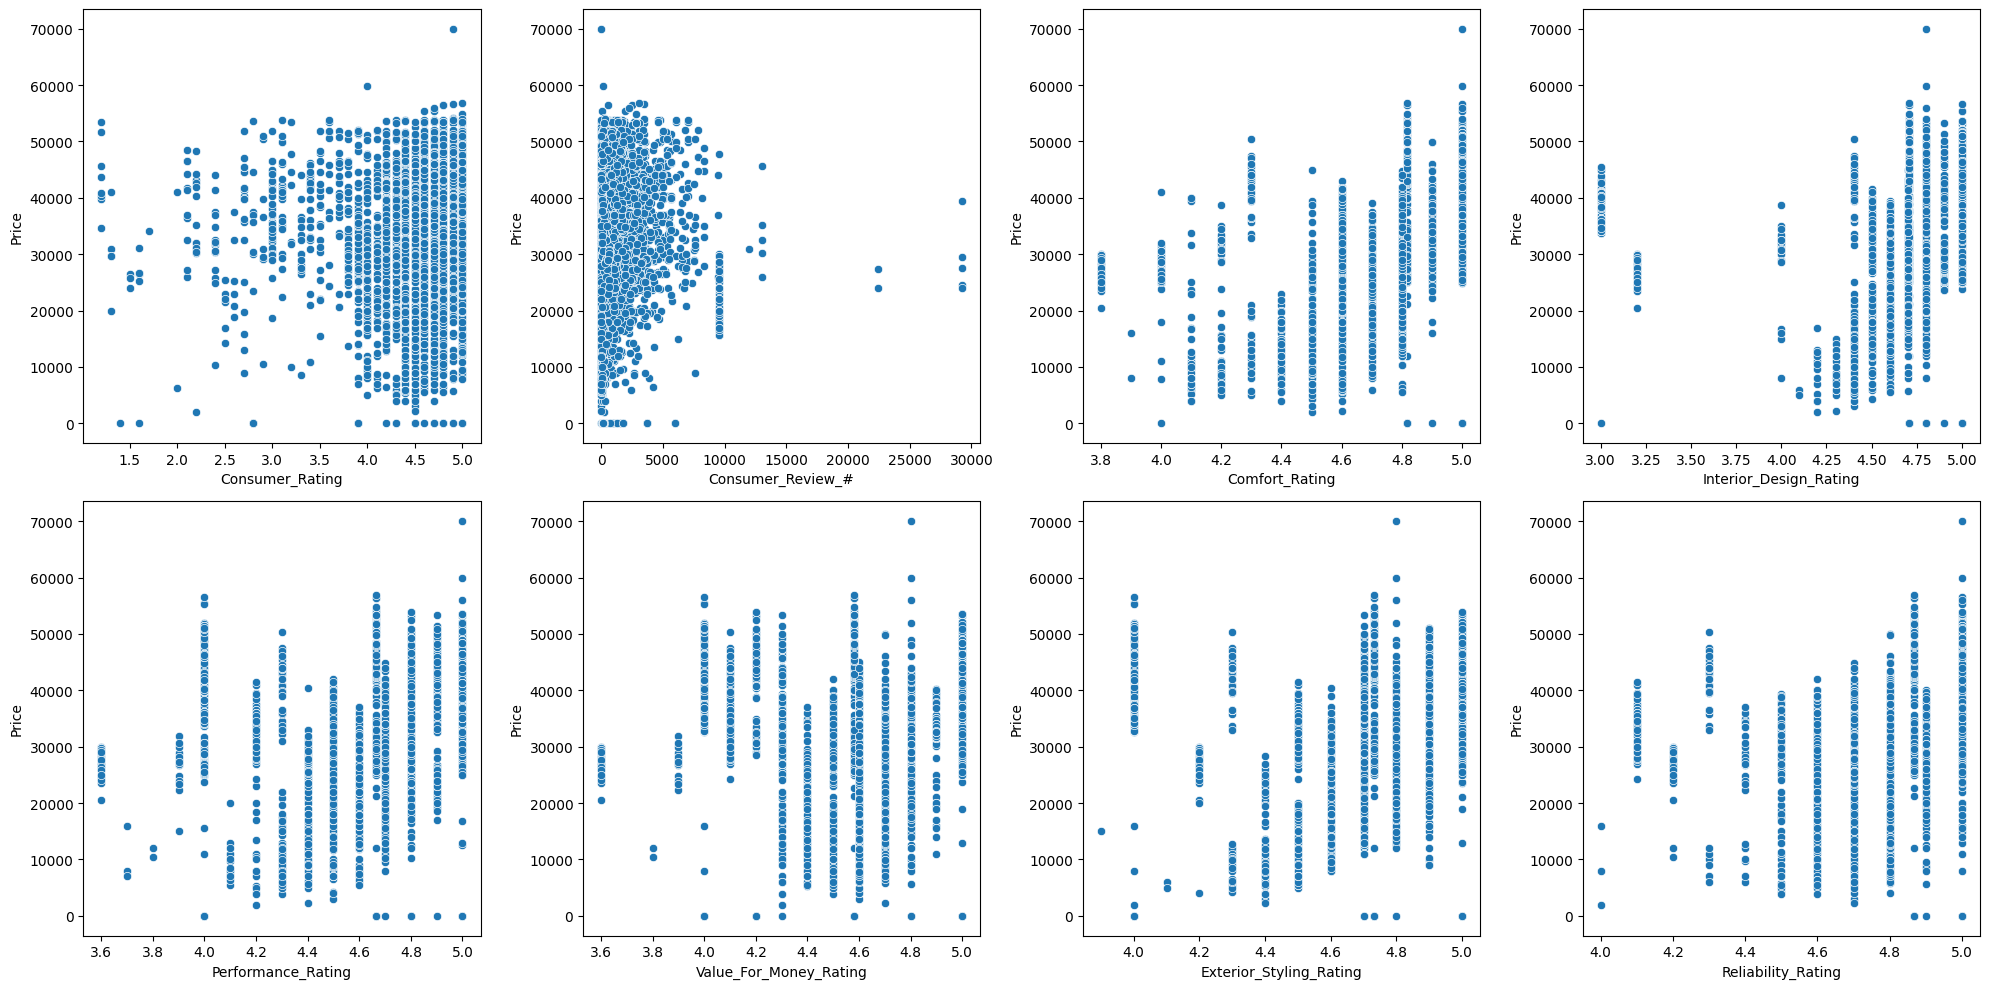

In [ ]:
num_vars = ['Consumer_Rating', 'Consumer_Review_#', 'Comfort_Rating', 'Interior_Design_Rating', 'Performance_Rating',
            'Value_For_Money_Rating', 'Exterior_Styling_Rating', 'Reliability_Rating']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

## To visualize using scatterplot

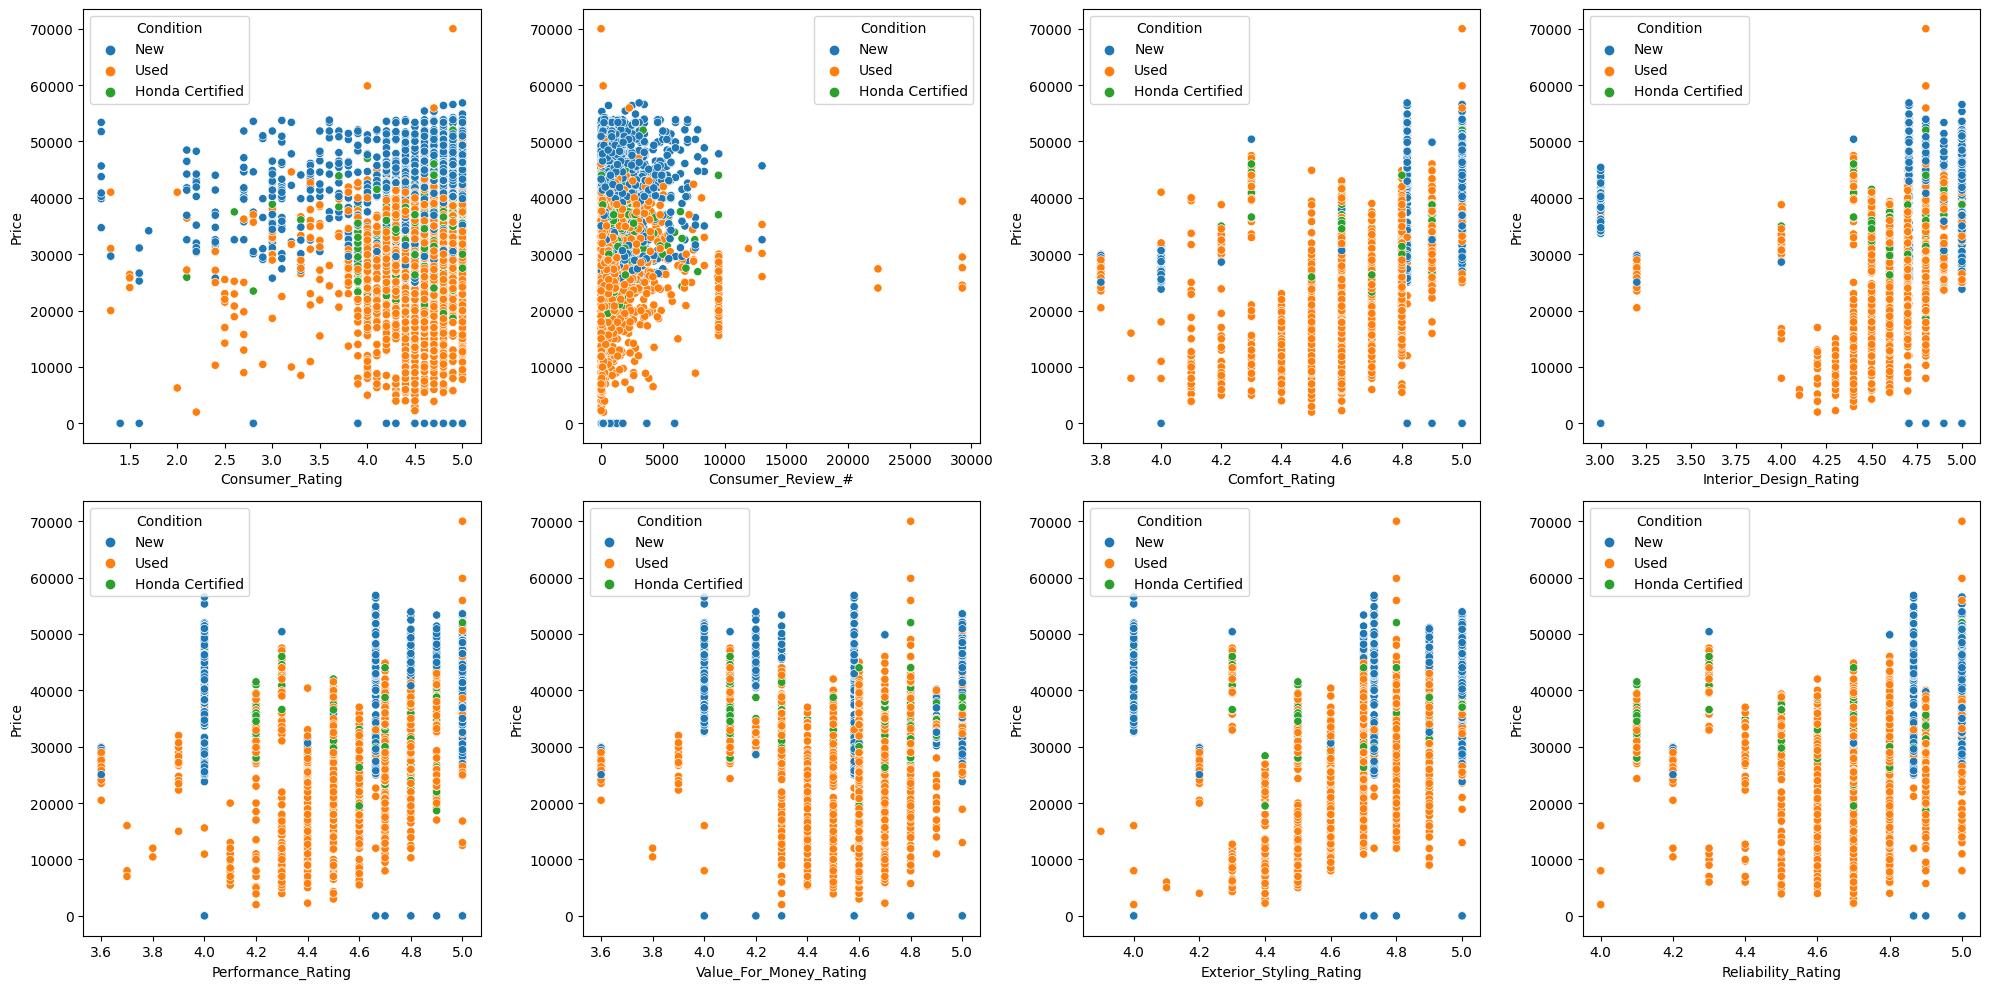

In [ ]:
num_vars = ['Consumer_Rating', 'Consumer_Review_#', 'Comfort_Rating', 'Interior_Design_Rating', 'Performance_Rating',
            'Value_For_Money_Rating', 'Exterior_Styling_Rating', 'Reliability_Rating']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price', hue='Condition', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

# Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4999 non-null   int64  
 1   Make                     4999 non-null   object 
 2   Condition                4999 non-null   object 
 3   Price                    4999 non-null   int64  
 4   Consumer_Rating          4999 non-null   float64
 5   Consumer_Review_#        4999 non-null   int64  
 6   Drivetrain               4999 non-null   object 
 7   Fuel_Type                4999 non-null   object 
 8   Comfort_Rating           4999 non-null   float64
 9   Interior_Design_Rating   4999 non-null   float64
 10  Performance_Rating       4999 non-null   float64
 11  Value_For_Money_Rating   4999 non-null   float64
 12  Exterior_Styling_Rating  4999 non-null   float64
 13  Reliability_Rating       4999 non-null   float64
 14  State                   

In [ ]:
df.drop(columns=['Make'], inplace=True)
df.shape

(4999, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4999 non-null   int64  
 1   Condition                4999 non-null   object 
 2   Price                    4999 non-null   int64  
 3   Consumer_Rating          4999 non-null   float64
 4   Consumer_Review_#        4999 non-null   int64  
 5   Drivetrain               4999 non-null   object 
 6   Fuel_Type                4999 non-null   object 
 7   Comfort_Rating           4999 non-null   float64
 8   Interior_Design_Rating   4999 non-null   float64
 9   Performance_Rating       4999 non-null   float64
 10  Value_For_Money_Rating   4999 non-null   float64
 11  Exterior_Styling_Rating  4999 non-null   float64
 12  Reliability_Rating       4999 non-null   float64
 13  State                    4999 non-null   object 
 14  Seller_Type             

## Label Encoding for Object datatype

In [ ]:
# change the categorical data to be numerical values. So we can use the data for prediction
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['State'] = label_encoder.fit_transform(df['State'])
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Condition'] = label_encoder.fit_transform(df['Condition'])
df['Drivetrain'] = label_encoder.fit_transform(df['Drivetrain'])
df['Seller_Type'] = label_encoder.fit_transform(df['Seller_Type'])

## Remove Outlier Using Z-Score

In [ ]:
from scipy import stats

# define a function to remove outliers using z-score for only selected numerical columns
def remove_outliers(df, cols, threshold=3):
    # loop over each selected column
    for col in cols:
        # calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(df[col]))
        # remove rows with z-score greater than threshold in selected column
        df = df[(z < threshold) | (df[col].isnull())]
    return df

In [ ]:
#before removed
df.shape

(4999, 15)

In [ ]:
#after removed
selected_cols = ['Consumer_Rating', 'Consumer_Review_#', 'Comfort_Rating', 'Interior_Design_Rating', 'Performance_Rating',
            'Value_For_Money_Rating', 'Exterior_Styling_Rating', 'Reliability_Rating']
df_clean = remove_outliers(df, selected_cols)
df_clean.shape

(4258, 15)

## Feature Selection

### Correlation Matrix

<Axes: >

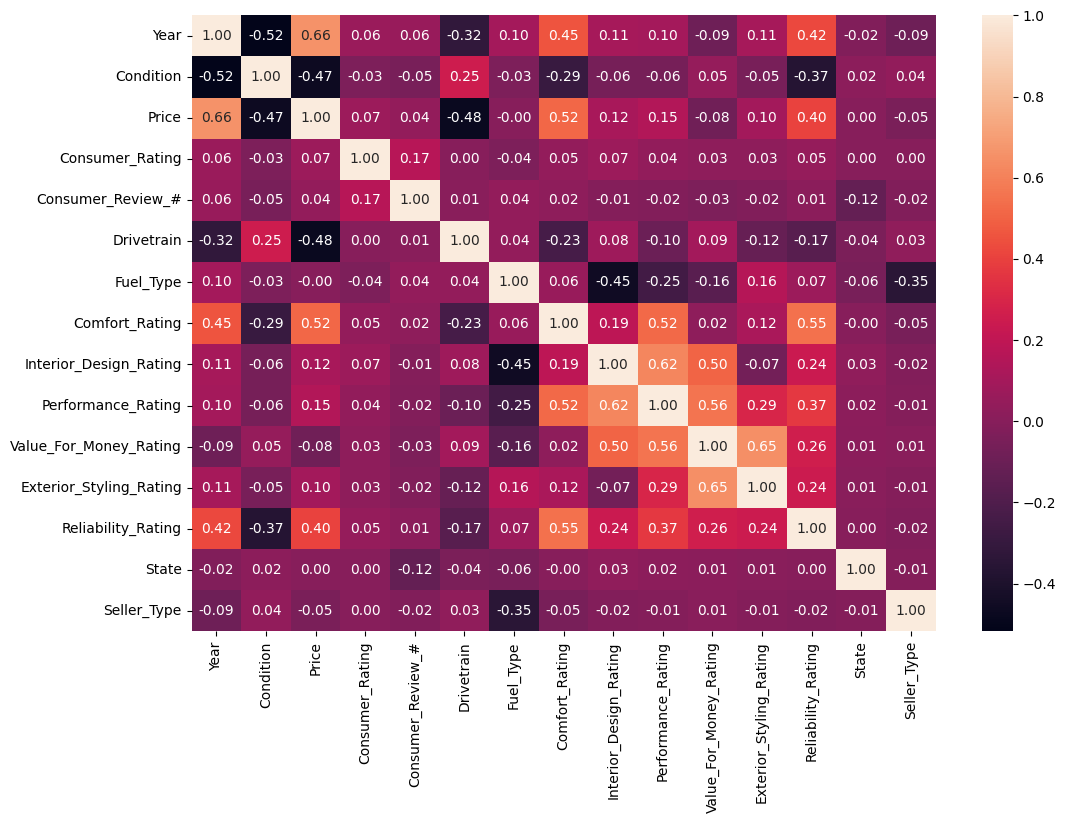

In [ ]:
corr_matrix = df.corr()
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,fmt='.2f',annot=True)

# Feature Importances

## Recursive feature elimination (RFE) with random forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df.drop(columns="Price",axis=1)
y = df['Price']

# Pisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Rentang pemilihan total fitur (5 hingga 20)
num_features_range = range(5, 21)

# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Inisialisasi variabel untuk menyimpan hasil evaluasi
results = {
    'Num_Features': [],
    'MAE': [],
    'RMSE': [],
    'R2': [],
    'MAPE': []
}


for num_features in num_features_range:
    # Membuat objek RFE dengan model Random Forest
    rfe = RFE(estimator=rf_model, n_features_to_select=num_features)
    # Fitting RFE ke data pelatihan
    rfe.fit(X_train, y_train)


    # Memilih fitur-fitur terpilih
    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)

    # Melatih model pada fitur-fitur terpilih
    rf_model.fit(X_train_selected, y_train)

    # Melakukan prediksi
    y_pred = rf_model.predict(X_test_selected)

    # Menghitung metrik evaluasi
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


    # Menyimpan hasil evaluasi
    results['Num_Features'].append(num_features)
    results['MAE'].append(mae)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)
    results['MAPE'].append(mape)

# Membuat dataframe dari hasil evaluasi
results_df = pd.DataFrame(results)

# Menampilkan hasil evaluasi
print(results_df)


    Num_Features          MAE         RMSE        R2  MAPE
0              5  3551.170749  5788.148910  0.700868   inf
1              6  3264.071168  5576.517603  0.722342   inf
2              7  3067.866974  5161.301916  0.762151   inf
3              8  3077.773619  5206.023205  0.758011   inf
4              9  3050.733665  5152.724512  0.762940   inf
5             10  3035.429157  5146.914462  0.763475   inf
6             11  3056.682490  5163.719685  0.761928   inf
7             12  3030.457295  5125.381381  0.765450   inf
8             13  2995.036378  5079.762625  0.769606   inf
9             14  2996.635818  5086.925495  0.768956   inf
10            15  2996.635818  5086.925495  0.768956   inf
11            16  2996.635818  5086.925495  0.768956   inf
12            17  2996.635818  5086.925495  0.768956   inf
13            18  2996.635818  5086.925495  0.768956   inf
14            19  2996.635818  5086.925495  0.768956   inf
15            20  2996.635818  5086.925495  0.768956   i

1. MAE, RMSE, dan MAPE adalah metrik kesalahan prediksi yang digunakan untuk mengukur sejauh mana prediksi model mendekati nilai sebenarnya.

2. Semua tiga metrik ini memiliki interpretasi yang mudah dimengerti dalam hal kesalahan prediksi dalam unit yang sama dengan variabel target.

3. MAE, RMSE, dan MAPE semakin kecil semakin baik dalam arti bahwa model memiliki kesalahan prediksi yang lebih rendah.

4. R2, di sisi lain, mengukur seberapa baik model secara umum sesuai dengan data, bukan seberapa akurat prediksinya.

5. Nilai R2 yang tinggi menunjukkan bahwa model secara umum cocok dengan data dengan baik, tetapi ini tidak memberikan gambaran tentang sejauh mana model akurat dalam meramalkan nilai sebenarnya.

In [ ]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores))

Number of features:  5
['Year', 'Consumer_Review_#', 'Drivetrain', 'Comfort_Rating', 'Exterior_Styling_Rating']
Number of features:  6
['Year', 'Consumer_Review_#', 'Drivetrain', 'Comfort_Rating', 'Performance_Rating', 'Exterior_Styling_Rating']
Number of features:  7
['Year', 'Consumer_Review_#', 'Drivetrain', 'Comfort_Rating', 'Performance_Rating', 'Exterior_Styling_Rating', 'State']
Number of features:  8
['Year', 'Consumer_Rating', 'Consumer_Review_#', 'Drivetrain', 'Comfort_Rating', 'Performance_Rating', 'Exterior_Styling_Rating', 'State']
Number of features:  9
['Year', 'Consumer_Rating', 'Consumer_Review_#', 'Drivetrain', 'Comfort_Rating', 'Performance_Rating', 'Value_For_Money_Rating', 'Exterior_Styling_Rating', 'State']
Number of features:  10
['Year', 'Consumer_Rating', 'Consumer_Review_#', 'Drivetrain', 'Comfort_Rating', 'Interior_Design_Rating', 'Performance_Rating', 'Value_For_Money_Rating', 'Exterior_Styling_Rating', 'State']
Number of features:  11
['Year', 'Consumer_Rat

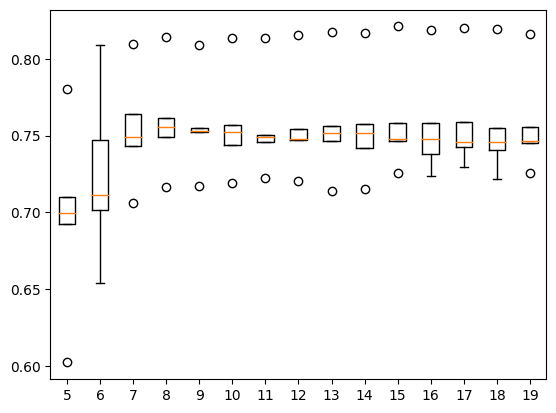

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, cross_val_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
X = df.drop(columns="Price",axis=1)
y = df['Price']


std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

results=[]
num_feat=[]
for i in range(5,20):
    model = RandomForestRegressor()
    rfe = RFE(estimator=model,n_features_to_select=i,step=5)
    rfe.fit(X_std, y)
    X_temp = X[X.loc[:,rfe.support_].columns.tolist()]


    scores = cross_val_score(model, X_temp, y, scoring="r2", cv=5)
    print("Number of features: ",i)
    print(X.loc[:,rfe.support_].columns.tolist())

    num_feat.append(i)
    results.append((scores))
    print("=====================")
plt.boxplot(results,labels=num_feat)
plt.show()
#     print(X[rfe.support_])

# Machine Learning Model Building

In [ ]:
X = df[['Year', 'Condition', 'Consumer_Rating', 'Consumer_Review_#', 'Drivetrain', 'Fuel_Type',
        'Comfort_Rating', 'Interior_Design_Rating', 'Performance_Rating', 'Value_For_Money_Rating',
        'Exterior_Styling_Rating', 'Reliability_Rating', 'State']]
y = df_clean['Price']


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
## DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0)
ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
Logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Algoritma Machine Learning

dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
ada = AdaBoostRegressor(random_state=0)
regressor = LinearRegression()
Logreg = LogisticRegression()

models = [dt, rf, ada, regressor, Logreg]

In [ ]:
results = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R2 Score', 'RMSE'])

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = math.sqrt(mse)
    results = results.append({'Model': str(model), 'MAE': mae, 'MSE': mse, 'R2 Score': r2, 'RMSE': rmse}, ignore_index=True)

<ipython-input-51-2f3dc0f1f4c2>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': str(model), 'MAE': mae, 'MSE': mse, 'R2 Score': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-51-2f3dc0f1f4c2>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': str(model), 'MAE': mae, 'MSE': mse, 'R2 Score': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-51-2f3dc0f1f4c2>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': str(model), 'MAE': mae, 'MSE': mse, 'R2 Score': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-51-2f3dc0f1f4c2>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

In [ ]:
# Menampilkan hasil dalam bentuk tabel
print(results)

                                   Model          MAE           MSE  R2 Score  \
0  DecisionTreeRegressor(random_state=0)  3511.881132  3.317144e+07  0.703825   
1  RandomForestRegressor(random_state=0)  3016.355482  2.629367e+07  0.765234   
2      AdaBoostRegressor(random_state=0)  5169.982574  5.063237e+07  0.547924   
3                     LinearRegression()  4857.371092  5.034568e+07  0.550483   
4                   LogisticRegression()  4625.912000  6.335061e+07  0.434367   

          RMSE  
0  5759.465148  
1  5127.735485  
2  7115.642298  
3  7095.469217  
4  7959.309458  


Dengan mempertimbangkan hasil evaluasi dari beberapa model dan juga dikaitkan dengan tujuan dari model ini adalah menekan atau meminimalkan kesalahan besar serta mengukur kinerja model yang digunakan untuk menentukan harga produk oleh karena itu terpilih random forest yang menjadi model terbaik dengan skor MAE dan MSE terkecil diantara yang lain nya.